# Evaluate predictions of GB1 Mutations

Our dataset is the GB1 combinatorial evaluation of GB1 mutations by:

> Wu, Nicholas C., Lei Dai, C. Anders Olson, James O. Lloyd-Smith, and Ren Sun. 2016. “Adaptation in Protein Fitness Landscapes Is Facilitated by Indirect Paths.” eLife 5 (July). https://doi.org/10.7554/eLife.16965.

The mutations are at: `V39, D40, G41 and V54`

WT sequence: `MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDDATKTFTVTE`



In [1]:
%load_ext autoreload
%autoreload 2

from app.helpers.sequence_util import maybe_get_allele_id_error_message, \
  maybe_get_seq_id_error_message, \
  get_measured_and_unmeasured_mutant_seq_ids, \
  get_locus_from_allele_id, \
  get_loci_set, \
  allele_set_to_seq_id
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import pandas as pd
wt_gb1_seq = 'MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDDATKTFTVTE'
gb1_df = pd.read_excel('notebooks/data/wu2016-gb1-measured-supp1-v4.xlsx')

/Users/jacobroberts/miniforge3/envs/foldy-env312/lib/python3.12/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [3]:
def mutant_name_to_seq_id(mutant_name):
  """Converts a mutant name like ADVV (corresponds to V39A, D40D, G41V, V54V) to the sequence ID (like V39A_G41V)."""
  wt_residues = [(39, 'V'), (40, 'D'), (41, 'G'), (54, 'V')]
  wt_chars = 'VDGV'
  mutant_chars = mutant_name.upper()
  assert len(mutant_chars) == 4, f"Mutant name must be 4 characters long, got {mutant_name}"

  allele_id_list = []
  for mutant_char, (wt_locus, wt_char) in zip(mutant_chars, wt_residues):
    if mutant_char != wt_char:
      allele_id_list.append(f"{wt_char}{wt_locus}{mutant_char}")
  
  if len(allele_id_list) == 0:
    seq_id = 'WT'
  else:
    seq_id = '_'.join(allele_id_list)

  possible_error_msg = maybe_get_seq_id_error_message(wt_gb1_seq, seq_id)
  if possible_error_msg:
    raise ValueError(possible_error_msg)
  return seq_id

assert mutant_name_to_seq_id('ADVV') == 'V39A_G41V'


In [4]:
gb1_df['seq_id'] = gb1_df['Variants'].apply(mutant_name_to_seq_id)
gb1_df

,Variants,HD,Count input,Count selected,Fitness,seq_id
0,VDGV,0,92735,338346,1.000000,WT
1,ADGV,1,34,43,0.061910,V39A
2,CDGV,1,850,641,0.242237,V39C
3,DDGV,1,63,63,0.006472,V39D
4,EDGV,1,841,190,0.032719,V39E
...,...,...,...,...,...,...
149356,YYYR,4,203,1,0.001350,V39Y_D40Y_G41Y_V54R
149357,YYYS,4,186,3,0.004421,V39Y_D40Y_G41Y_V54S
149358,YYYT,4,181,14,0.021200,V39Y_D40Y_G41Y_V54T
149359,YYYW,4,30,1,0.009136,V39Y_D40Y_G41Y_V54W


In [5]:
# Write seq_ids to file, to do embedding
# with open('notebooks/data/gb1_seq_ids.txt', 'w') as f:
#   for seq_id in gb1_df.seq_id:
#     f.write(f"{seq_id}\n")


## Take embeddings and try fitting

In [7]:
embedding_df = pd.read_csv('notebooks/data/gb1_combinatorial_esmc_600m.csv')
embedding_df['index'] = embedding_df.seq_id

In [7]:
embedding_df

,seq_id,seq,embedding,index
0,V39H_D40V_G41P_V54Q,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGHVPEWTYD...,"[-0.005768774542957544, 0.004565328359603882, ...",V39H_D40V_G41P_V54Q
1,V39Q_D40I_G41N_V54L,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGQINEWTYD...,"[-0.003780871629714966, 0.0037607706617563963,...",V39Q_D40I_G41N_V54L
2,V39R_D40L_G41Y_V54C,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGRLYEWTYD...,"[-0.005188265815377235, -0.0004440322518348694...",V39R_D40L_G41Y_V54C
3,V39T_D40N_G41T_V54F,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGTNTEWTYD...,"[-0.001399860018864274, 0.006423125043511391, ...",V39T_D40N_G41T_V54F
4,D40T_G41F_V54K,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVTFEWTYD...,"[-0.006125430576503277, 0.005645254161208868, ...",D40T_G41F_V54K
...,...,...,...,...
149356,V39G_D40V_G41K_V54H,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGGVKEWTYD...,"[-0.0039820889942348, 0.0061037284322083, 0.01...",V39G_D40V_G41K_V54H
149357,V39P_D40C_G41C_V54L,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGPCCEWTYD...,"[-0.004585502669215202, -0.0019502810901030898...",V39P_D40C_G41C_V54L
149358,V39G_D40I_G41Q_V54S,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGGIQEWTYD...,"[-0.003242294304072857, 0.006303032394498587, ...",V39G_D40I_G41Q_V54S
149359,V39A_D40V_G41P_V54A,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGAVPEWTYD...,"[-0.003882558783516288, 0.0020035007037222385,...",V39A_D40V_G41P_V54A


In [8]:
import json
import numpy as np

activity_df = gb1_df.iloc[:10000].copy()
activity_df['index'] = activity_df.seq_id
activity_df['activity'] = activity_df.Fitness

# Get measured and unmeasured mutant sets
measured_mutants, unmeasured_mutants = get_measured_and_unmeasured_mutant_seq_ids(
    activity_df, embedding_df
)

# Prepare training data
X_train = np.vstack(
    [json.loads(x) for x in embedding_df.loc[activity_df.index].embedding]
)
y_train = activity_df.activity.to_numpy()

In [27]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=100,
    criterion="friedman_mse",
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=1.0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=1,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
)
model.fit(X_train, y_train)

RandomForestRegressor(criterion='friedman_mse', random_state=1)

In [28]:
all_mutants_embedding_array = np.vstack(
    [json.loads(x) for x in embedding_df.embedding]
)

In [29]:
y_all_pred = model.predict(all_mutants_embedding_array)
y_all_pred

array([0.00329147, 0.19835045, 0.22542581, ..., 0.00852276, 0.01952721,
       0.03394628], shape=(149361,))

In [30]:
embedding_df['predicted_activity'] = y_all_pred

In [31]:
joined_df = pd.merge(
  gb1_df,
  embedding_df[['seq_id', 'predicted_activity']],
  left_on='seq_id',
  # right_on='index',
  right_index=True,
  how='left'
)
joined_df

,seq_id,Variants,HD,Count input,Count selected,Fitness,seq_id_x,seq_id_y,predicted_activity
0,WT,VDGV,0,92735,338346,1.000000,WT,WT,0.837997
1,V39A,ADGV,1,34,43,0.061910,V39A,V39A,0.110620
2,V39C,CDGV,1,850,641,0.242237,V39C,V39C,0.286167
3,V39D,DDGV,1,63,63,0.006472,V39D,V39D,0.016545
4,V39E,EDGV,1,841,190,0.032719,V39E,V39E,0.036330
...,...,...,...,...,...,...,...,...,...
149356,V39Y_D40Y_G41Y_V54R,YYYR,4,203,1,0.001350,V39Y_D40Y_G41Y_V54R,V39Y_D40Y_G41Y_V54R,1.226468
149357,V39Y_D40Y_G41Y_V54S,YYYS,4,186,3,0.004421,V39Y_D40Y_G41Y_V54S,V39Y_D40Y_G41Y_V54S,1.378643
149358,V39Y_D40Y_G41Y_V54T,YYYT,4,181,14,0.021200,V39Y_D40Y_G41Y_V54T,V39Y_D40Y_G41Y_V54T,0.943078
149359,V39Y_D40Y_G41Y_V54W,YYYW,4,30,1,0.009136,V39Y_D40Y_G41Y_V54W,V39Y_D40Y_G41Y_V54W,0.678911


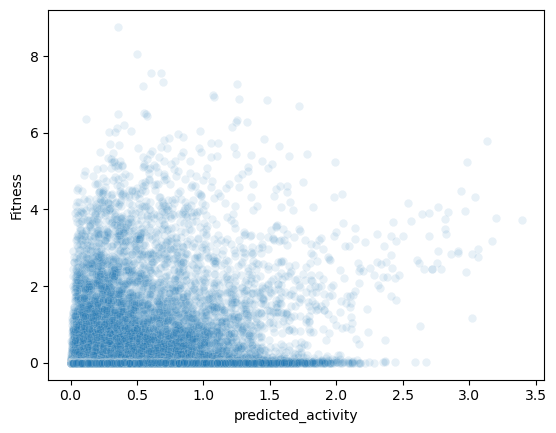

In [44]:
import seaborn as sns

predicted_df = joined_df[~joined_df.seq_id.isin(activity_df.seq_id)]
ax = sns.scatterplot(
  data=predicted_df,
  x='predicted_activity',
  y='Fitness',
  alpha=0.1
  # bins=40,
  # cmap='viridis'
  # alpha=0.01
)
# ax.set_xlim(0, 0.5)

In [38]:
from scipy.stats import spearmanr
predicted_df = joined_df[~joined_df.seq_id.isin(activity_df.seq_id)]
spearmanr(predicted_df.predicted_activity, predicted_df.Fitness)


SignificanceResult(statistic=np.float64(0.33639518396025186), pvalue=np.float64(0.0))

## Gameplan

**Goal**: Inform future high-depth design algorithms.

**Approach**: Quantify prediction quality for different design approaches.


| Design Approach | Necessary Simulation |
|---|---|
| The EvolvePRO Approach | Given a bunch of single mutant measurements, can we suggest new single mutants? |
| EvolvePRO++ | Given a bunch of single mutants, can we suggest a stacked mutant on top? | 
| Suggest new residues at measured loci | Given known mutations at one locus, can we predict other mutations at that locus? |
| Add a new mutation to previous best performer | Given known mutations off of the WT sequence, can we predict behavior of new mutations stacked on top of the best performer? |
| Combine known, measured single mutants | Given measured individual mutations at two loci, can we predict how those mutations combine? |

In [2]:
phot_wt_aa_seq = 'AGLRHTFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFLQGEGTDPKEVQKIRDAIKKGEACSVRLLNYRKDGTPFWNLLTVTPIKTPDGRVSKFVGVQVDVTSKTEGKALA'
phot_df = pd.read_csv('notebooks/data/DMS_ProteinGym_substitutions/PHOT_CHLRE_Chen_2023.csv')
phot_df['seq_id'] = phot_df.mutant.apply(lambda v: v.replace(':', '_'))
for seq_id in phot_df.seq_id:
  err = maybe_get_seq_id_error_message(phot_wt_aa_seq, seq_id)
  assert not err, err


In [4]:
# Write seq_ids to file, to do embedding
with open('notebooks/data/phot_seq_ids.txt', 'w') as f:
  for seq_id in phot_df.seq_id:
    f.write(f"{seq_id}\n")


NameError: name 'phot_df' is not defined

In [3]:
phot_df['num_mutations'] = phot_df.seq_id.apply(lambda sid: len(sid.split('_'))+1)

/var/folders/p6/jn7zk09154v2f60d993vb2sm0000gn/T/ipykernel_83397/234252761.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=phot_df, x='num_mutations', y='DMS_score', ci='sd')


<Axes: xlabel='num_mutations', ylabel='DMS_score'>

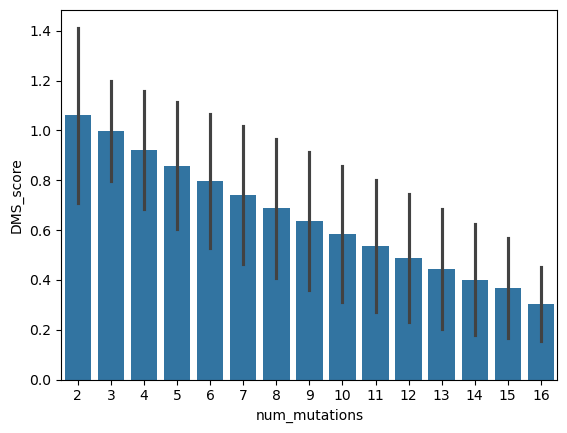

In [4]:
import seaborn as sns
sns.barplot(data=phot_df, x='num_mutations', y='DMS_score', ci='sd')

<Axes: xlabel='num_mutations', ylabel='Count'>

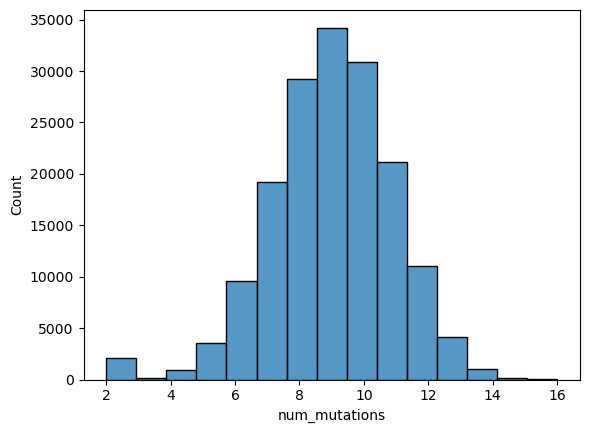

In [5]:
sns.histplot(data=phot_df, x='num_mutations', bins=15)

<Axes: xlabel='locus', ylabel='count'>

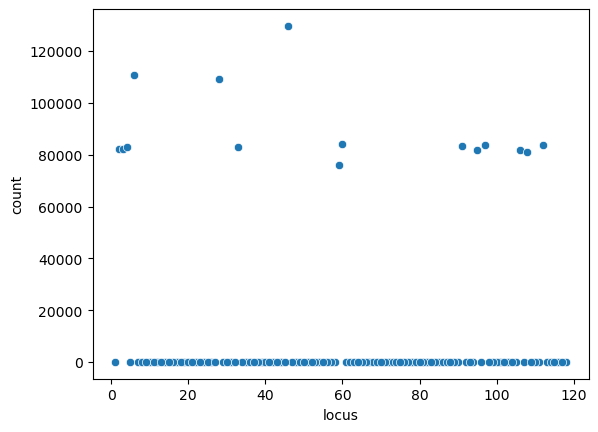

In [6]:
from collections import defaultdict
locus_counts = defaultdict(int)
for sid in phot_df.seq_id:
  for allele_id in sid.split('_'):
    locus_counts[get_locus_from_allele_id(allele_id)] += 1
locus_counts_df = pd.DataFrame({
  'locus': list(locus_counts.keys()),
  'count': list(locus_counts.values())
})
sns.scatterplot(data=locus_counts_df, x='locus', y='count')


<Axes: xlabel='rank', ylabel='num'>

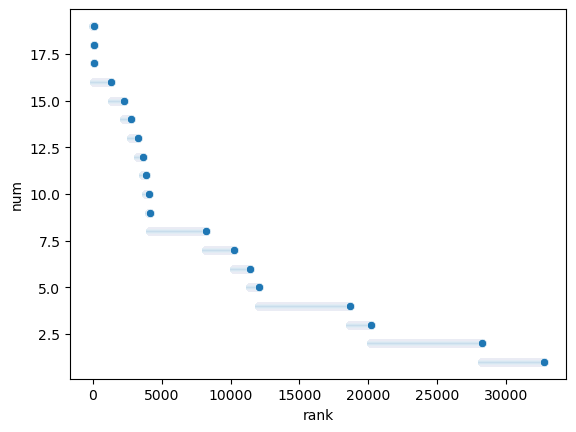

In [7]:
import numpy as np

locus_set_counts = defaultdict(int)
for sid in phot_df.seq_id:
  locus_set_counts[str(sorted(list(get_loci_set(sid))))] += 1
locus_set_counts_df = pd.DataFrame({
  'locus_set': list(locus_set_counts.keys()),
  'num': list(locus_set_counts.values())
}).sort_values('num', ascending=False)
locus_set_counts_df['rank'] = np.arange(len(locus_set_counts_df))
sns.scatterplot(data=locus_set_counts_df, x='rank', y='num')

<Axes: >

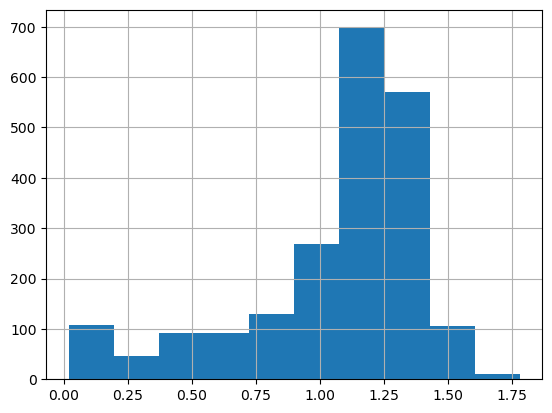

In [8]:
phot_df[phot_df.num_mutations == 2].DMS_score.hist()

## Look for epistasis

Epistasis is defined as a quadruple of mutations where:

|baseline_seq|!has_allele1|has_allele1|
|---|---|---|
|!has_allele2|base activity|⬇️ base activity |
|has_allele2|⬇️ base activity | ⬆️⬆️ base activity |

In [9]:
# from tqdm import tqdm
# from pandarallel import pandarallel
# from tqdm.auto import tqdm

# pandarallel.initialize(progress_bar=True)
# tqdm.pandas(desc="Progress")


# phot_df['seq_id_set'] = phot_df.seq_id.apply(lambda sid: set(sid.split('_')))

# seq_to_neighbors = {}

# def get_nearby_seq_ids(base_seq_id_set):
#   def get_distance_to_base_set(sid_set):
#     # return len((base_seq_id_set | sid_set) - (base_seq_id_set & sid_set))
#     return len(base_seq_id_set.symmetric_difference(sid_set))
#   nearby_phots = phot_df[phot_df.seq_id_set.apply(get_distance_to_base_set) == 1]
#   if len(nearby_phots) == 0:
#     return []
#   nearby_seq_ids = nearby_phots.seq_id.tolist()
#   return nearby_seq_ids

# phot_df['nearby_seq_ids'] = phot_df.seq_id_set.parallel_apply(get_nearby_seq_ids)

# phot_df[phot_df.nearby_seq_ids.apply(len) > 0]

# phot_df.to_csv('notebooks/data/phot_df_with_neighbors.csv')

In [10]:
import ast
phot_df = pd.read_csv('notebooks/data/phot_df_with_neighbors.csv')
phot_df['nearby_seq_ids'] = phot_df.nearby_seq_ids.apply(ast.literal_eval)

In [15]:
from tqdm import tqdm

quads = []

for base_seq_id in tqdm(phot_df[phot_df.nearby_seq_ids.apply(lambda v: len(v) > 0)].seq_id):
  base_seq_id_set = set(base_seq_id.split('_'))
  nearby_seq_ids = phot_df[phot_df.seq_id == base_seq_id].nearby_seq_ids.values[0]
  nearby_seq_id_sets = [set(sid.split('_')) for sid in nearby_seq_ids]
  nearby_set_diffs = [nearby_seq_id_set - base_seq_id_set for nearby_seq_id_set in nearby_seq_id_sets]

  for idx1, nearby1 in enumerate(nearby_set_diffs):
    for idx2, nearby2 in enumerate(nearby_set_diffs):
      if idx1 == idx2:
        continue
      if len(nearby1) == 0 or len(nearby2) == 0:
        continue
      assert len(nearby1) == 1 and len(nearby2) == 1, (nearby1, nearby2)

      mut1 = nearby1.pop()
      mut2 = nearby2.pop()

      mut1_seq_id = nearby_seq_ids[idx1]
      mut2_seq_id = nearby_seq_ids[idx2]

      # See if the base+mut1+mut1 is in the dataset
      base_mut1_mut2_seq_id = allele_set_to_seq_id(base_seq_id_set | {mut1, mut2})
      if not phot_df[phot_df.seq_id == base_mut1_mut2_seq_id].empty:
        # print(f'Found quad: {base_seq_id} {mut1_seq_id} {mut2_seq_id} {base_mut1_mut2_seq_id}')
        quads.append((base_seq_id, mut1_seq_id, mut2_seq_id, base_mut1_mut2_seq_id))

100%|██████████| 165427/165427 [1:28:22<00:00, 31.20it/s]


In [20]:
from tqdm import tqdm

epistatic_quads = []

for quad in tqdm(quads):
  phot_subset = phot_df[phot_df.seq_id.isin(quad)]
  base_fitness = phot_subset[phot_subset.seq_id == quad[0]].DMS_score.values[0]
  mut1_fitness = phot_subset[phot_subset.seq_id == quad[1]].DMS_score.values[0]
  mut2_fitness = phot_subset[phot_subset.seq_id == quad[2]].DMS_score.values[0]
  base_mut1_mut2_fitness = phot_subset[phot_subset.seq_id == quad[3]].DMS_score.values[0]

  if mut1_fitness < base_fitness and mut2_fitness < base_fitness and base_mut1_mut2_fitness > base_fitness:
    epistatic_quads.append(quad)

epistatic_quads


100%|██████████| 433194/433194 [36:33<00:00, 197.53it/s]


[('A28H_D60Q_D95Q_R97D_T112E',
  'A28H_D60Q_I91C_D95Q_R97D_T112E',
  'A28H_G33T_D60Q_D95Q_R97D_T112E',
  'A28H_G33T_D60Q_I91C_D95Q_R97D_T112E'),
 ('A28H_D60Q_I91C_D95Q_T112E',
  'A28H_D60Q_I91C_D95Q_R97D_T112E',
  'A28H_D60Q_I91C_D95Q_V106M_T112E',
  'A28H_D60Q_I91C_D95Q_R97D_V106M_T112E'),
 ('A28H_D60Q_I91C_D95Q_V106M_V108Q_T112E',
  'L3N_A28H_D60Q_I91C_D95Q_V106M_V108Q_T112E',
  'R4D_A28H_D60Q_I91C_D95Q_V106M_V108Q_T112E',
  'L3N_R4D_A28H_D60Q_I91C_D95Q_V106M_V108Q_T112E'),
 ('A28H_D60Q_I91C_D95Q_V108Q',
  'A28H_D60Q_I91C_D95Q_R97D_V108Q',
  'A28H_D60Q_I91C_D95Q_V106M_V108Q',
  'A28H_D60Q_I91C_D95Q_R97D_V106M_V108Q'),
 ('A28H_D60Q_R97D_V108Q',
  'A28H_D60Q_R97D_V106M_V108Q',
  'A28H_D60Q_R97D_V108Q_T112E',
  'A28H_D60Q_R97D_V106M_V108Q_T112E'),
 ('A28H_D60Q_V106M_V108Q',
  'A28H_D60Q_R97D_V106M_V108Q',
  'A28H_D60Q_V106M_V108Q_T112E',
  'A28H_D60Q_R97D_V106M_V108Q_T112E'),
 ('A28H_D60Q_V108Q_T112E',
  'A28H_D60Q_R97D_V108Q_T112E',
  'A28H_D60Q_V106M_V108Q_T112E',
  'A28H_D60Q_R97D_V1

In [41]:
epistatic_quad_df = pd.DataFrame(epistatic_quads, columns=['base', 'mut1', 'mut2', 'base_mut1_mut2'])

def seq_id_to_allele_set(seq_id):
  return set(seq_id.split('_'))

epistatic_quad_df['allele1'] = epistatic_quad_df.apply(lambda v: (seq_id_to_allele_set(v['mut1']).difference(seq_id_to_allele_set(v['base']))).pop(), axis=1)
epistatic_quad_df['allele2'] = epistatic_quad_df.apply(lambda v: (seq_id_to_allele_set(v['mut2']).difference(seq_id_to_allele_set(v['base']))).pop(), axis=1)

epistatic_quad_df['base_activity'] = pd.merge(epistatic_quad_df, phot_df, left_on='base', right_on='seq_id', how='left')['DMS_score']
epistatic_quad_df['mut1_activity'] = pd.merge(epistatic_quad_df, phot_df, left_on='mut1', right_on='seq_id', how='left')['DMS_score']
epistatic_quad_df['mut2_activity'] = pd.merge(epistatic_quad_df, phot_df, left_on='mut2', right_on='seq_id', how='left')['DMS_score']
epistatic_quad_df['base_mut1_mut2_activity'] = pd.merge(epistatic_quad_df, phot_df, left_on='base_mut1_mut2', right_on='seq_id', how='left')['DMS_score']

epistatic_quad_df['both_vs_wt'] = epistatic_quad_df.base_mut1_mut2_activity - epistatic_quad_df.base_activity
epistatic_quad_df.sort_values('both_vs_wt', ascending=False).head()


,base,mut1,mut2,base_mut1_mut2,allele1,allele2,base_activity,mut1_activity,mut2_activity,base_mut1_mut2_activity,both_vs_wt
8121,L3N_R4D_T6H_A28K_R59N_D60Q_R97D_V106M_V108Q,G2E_L3N_R4D_T6H_A28K_R59N_D60Q_R97D_V106M_V108Q,L3N_R4D_T6H_A28K_G33T_R59N_D60Q_R97D_V106M_V108Q,G2E_L3N_R4D_T6H_A28K_G33T_R59N_D60Q_R97D_V106M...,G2E,G33T,0.691185,0.641681,0.655891,1.098770,0.407584
9482,L3N_T6H_A28K_G33T_D60Q_D95Q_V108Q,G2E_L3N_T6H_A28K_G33T_D60Q_D95Q_V108Q,L3N_R4D_T6H_A28K_G33T_D60Q_D95Q_V108Q,G2E_L3N_R4D_T6H_A28K_G33T_D60Q_D95Q_V108Q,G2E,R4D,0.707282,0.667745,0.700215,1.080544,0.373263
4791,G2E_R4D_T6S_A28K_Q46I_R59N_D60Q_I91C_D95Q_R97D...,G2E_L3N_R4D_T6S_A28K_Q46I_R59N_D60Q_I91C_D95Q_...,G2E_R4D_T6S_A28K_G33T_Q46I_R59N_D60Q_I91C_D95Q...,G2E_L3N_R4D_T6S_A28K_G33T_Q46I_R59N_D60Q_I91C_...,L3N,G33T,0.445847,0.420314,0.438660,0.815239,0.369392
12365,R4D_T6S_A28H_G33T_Q46I_R59N_V108Q,G2E_R4D_T6S_A28H_G33T_Q46I_R59N_V108Q,R4D_T6S_A28H_G33T_Q46I_R59N_D60Q_V108Q,G2E_R4D_T6S_A28H_G33T_Q46I_R59N_D60Q_V108Q,G2E,D60Q,0.742957,0.691021,0.705867,1.110590,0.367634
5085,G2E_R4D_T6S_R59N_D60Q_I91C_R97D_V108Q,G2E_R4D_T6S_A28K_R59N_D60Q_I91C_R97D_V108Q,G2E_R4D_T6S_G33T_R59N_D60Q_I91C_R97D_V108Q,G2E_R4D_T6S_A28K_G33T_R59N_D60Q_I91C_R97D_V108Q,A28K,G33T,1.019145,1.004551,0.796900,1.381468,0.362323


In [77]:
from Bio import PDB
import numpy as np

def load_pdb_structure(pdb_path: str, structure_id: str = "protein") -> PDB.Structure.Structure:
    """
    Load a PDB file and return the structure object.
    
    Args:
        pdb_path: Path to the PDB file
        structure_id: Identifier for the structure (default: "protein")
    
    Returns:
        BioPython Structure object
    """
    parser = PDB.PDBParser(QUIET=True)
    structure = parser.get_structure(structure_id, pdb_path)
    return structure

def get_residue_distance(structure: PDB.Structure.Structure, 
                        res1: str | int, 
                        res2: str | int,
                        chain_id: str = "A",
                        measure_by: str = "CA") -> float:
    """
    Calculate the distance between two residues in a protein structure.
    
    Args:
        structure: BioPython Structure object
        res1: First residue (either position number or chain+position like "A16")
        res2: Second residue (either position number or chain+position like "A16")
        chain_id: Chain identifier (default: "A") - only used if res1/res2 are integers
        measure_by: Atom to measure distance from ("CA" for alpha carbon, "CB" for beta carbon)
    
    Returns:
        Distance in Angstroms between the specified atoms of the two residues
    """
    # Helper function to parse residue identifier
    def parse_residue_id(res_id):
        if isinstance(res_id, int) or isinstance(res_id, np.int64):
            return chain_id, int(res_id)
        else:
            return res_id[0], int(res_id[1:])
    
    # Get chain and position for both residues
    chain1, pos1 = parse_residue_id(res1)
    chain2, pos2 = parse_residue_id(res2)
    
    # Get the residues
    model = structure[0]  # First model
    residue1 = model[chain1][pos1]
    residue2 = model[chain2][pos2]
    
    # Get the specified atoms
    try:
        atom1 = residue1[measure_by]
        atom2 = residue2[measure_by]
    except KeyError:
        raise ValueError(f"Could not find {measure_by} atom in one or both residues")
    
    # Calculate distance
    distance = atom1 - atom2
    
    return distance

In [65]:
# phot_structure = load_pdb_structure('notebooks/data/PHOT_CHLRE_Chen_2023.pdb')
phot_dimer_structure = load_pdb_structure('notebooks/data/PHOT-dimer.pdb')

In [71]:
list(phot_dimer_structure.get_chains())

[<Chain id=A>, <Chain id=B>]

In [75]:
phot_dimer_structure[0]['B']

<Chain id=B>

In [80]:
epistatic_quad_df['distance_intra'] = epistatic_quad_df.apply(lambda v: get_residue_distance(phot_dimer_structure, f"A{int(v['allele1'][1:-1])}", f"A{int(v['allele2'][1:-1])}"), axis=1)
epistatic_quad_df['distance_inter'] = epistatic_quad_df.apply(lambda v: get_residue_distance(phot_dimer_structure, f"A{int(v['allele1'][1:-1])}", f"B{int(v['allele2'][1:-1])}"), axis=1)
epistatic_quad_df['distance_min'] = epistatic_quad_df[['distance_intra', 'distance_inter']].min(axis=1)


<Axes: >

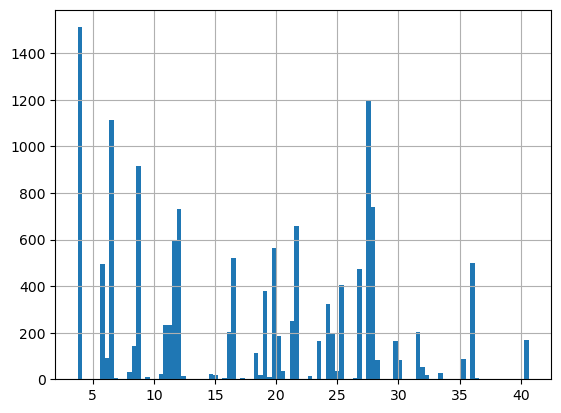

In [108]:
epistatic_quad_df.distance_min.hist(bins=100)

In [109]:
epistatic_quad_df[
  (epistatic_quad_df.distance_min > 26) &
  (epistatic_quad_df.distance_min < 28) ]

,base,mut1,mut2,base_mut1_mut2,allele1,allele2,base_activity,mut1_activity,mut2_activity,base_mut1_mut2_activity,both_vs_wt,distance,distance_quantile,distance_intra,distance_inter,distance_min
1,A28H_D60Q_I91C_D95Q_T112E,A28H_D60Q_I91C_D95Q_R97D_T112E,A28H_D60Q_I91C_D95Q_V106M_T112E,A28H_D60Q_I91C_D95Q_R97D_V106M_T112E,R97D,V106M,1.028090,0.992852,0.981058,1.105965,0.077876,29.306875,Q4,27.559803,29.306875,27.559803
3,A28H_D60Q_I91C_D95Q_V108Q,A28H_D60Q_I91C_D95Q_R97D_V108Q,A28H_D60Q_I91C_D95Q_V106M_V108Q,A28H_D60Q_I91C_D95Q_R97D_V106M_V108Q,R97D,V106M,0.881543,0.846995,0.817165,0.995088,0.113545,29.306875,Q4,27.559803,29.306875,27.559803
6,A28H_D60Q_V108Q_T112E,A28H_D60Q_R97D_V108Q_T112E,A28H_D60Q_V106M_V108Q_T112E,A28H_D60Q_R97D_V106M_V108Q_T112E,R97D,V106M,1.033890,1.005582,1.018056,1.173250,0.139359,29.306875,Q4,27.559803,29.306875,27.559803
12,A28H_G33T_D60Q_D95Q_V108Q,A28H_G33T_D60Q_D95Q_R97D_V108Q,A28H_G33T_D60Q_D95Q_V106M_V108Q,A28H_G33T_D60Q_D95Q_R97D_V106M_V108Q,R97D,V106M,0.925785,0.912636,0.890332,0.983615,0.057830,29.306875,Q4,27.559803,29.306875,27.559803
14,A28H_G33T_I91C_T112E,A28H_G33T_I91C_R97D_T112E,A28H_G33T_I91C_V106M_T112E,A28H_G33T_I91C_R97D_V106M_T112E,R97D,V106M,1.098305,1.044042,1.058300,1.140299,0.041994,29.306875,Q4,27.559803,29.306875,27.559803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14000,T6S_Q46R_R59N_D95Q_V108Q_T112E,T6S_Q46R_R59N_D95Q_R97D_V108Q_T112E,T6S_Q46R_R59N_D95Q_V106M_V108Q_T112E,T6S_Q46R_R59N_D95Q_R97D_V106M_V108Q_T112E,R97D,V106M,0.516313,0.487021,0.485877,0.528994,0.012681,29.306875,Q4,27.559803,29.306875,27.559803
14008,T6S_Q46R_R59N_I91C_T112E,T6S_Q46R_R59N_I91C_R97D_T112E,T6S_Q46R_R59N_I91C_V106M_T112E,T6S_Q46R_R59N_I91C_R97D_V106M_T112E,R97D,V106M,0.699367,0.662871,0.600664,0.715651,0.016284,29.306875,Q4,27.559803,29.306875,27.559803
14030,T6S_Q46V_D60Q_V108Q_T112E,T6S_Q46V_D60Q_R97D_V108Q_T112E,T6S_Q46V_D60Q_V106M_V108Q_T112E,T6S_Q46V_D60Q_R97D_V106M_V108Q_T112E,R97D,V106M,0.903958,0.862637,0.872598,0.905484,0.001525,29.306875,Q4,27.559803,29.306875,27.559803
14055,T6S_R59N_D60Q_I91C_D95Q_T112E,T6S_R59N_D60Q_I91C_D95Q_R97D_T112E,T6S_R59N_D60Q_I91C_D95Q_V106M_T112E,T6S_R59N_D60Q_I91C_D95Q_R97D_V106M_T112E,R97D,V106M,1.177258,1.086870,1.173824,1.179227,0.001969,29.306875,Q4,27.559803,29.306875,27.559803


In [ ]:
epistatic_pairs = epistatic_quad_df.groupby(['allele1', 'allele2']).agg({'base': 'count', 'distance_min': 'mean', ''}).sort_values(by='base', ascending=False)
epistatic_pairs.head(20)

base  distance_min
allele1 allele2                    
R97D    V106M    1097     27.559803
G2E     R4D      1060      6.559514
        L3N       938      3.780794
G33T    D60Q      739     28.045187
L3N     R4D       573      3.795214
G2E     G33T      564     19.794947
D60Q    R97D      518     16.393778
G2E     A28H      508     11.660999
A28K    G33T      502      8.759348
R97D    T112E     497     36.150589
D60Q    D95Q      443     21.825006
V106M   T112E     421     12.238896
D95Q    R97D      377      5.876284
L3N     G33T      341     19.122551
R4D     A28H      328      8.631235
G2E     D60Q      324     24.316801
A28K    D60Q      295     26.657967
T112E   V106M     282     12.238896
D60Q    V106M     233     21.303825
D95Q    V106M     200     31.540327

In [48]:
random_distance_df.describe()

,allele1,allele2
count,10000.000000,10000.000000
mean,59.710700,59.613700
std,34.032173,34.024883
min,1.000000,1.000000
25%,30.000000,30.000000
50%,60.000000,60.000000
75%,89.000000,89.000000
max,118.000000,118.000000


<Axes: >

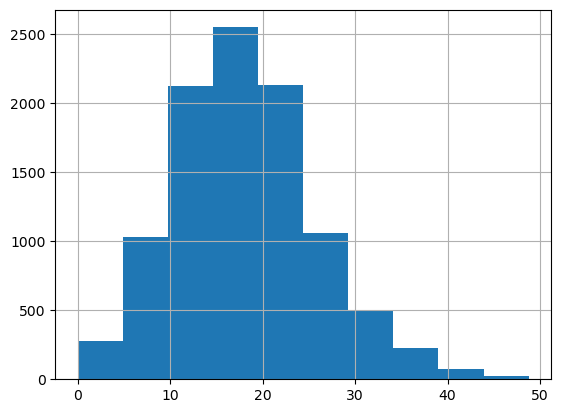

In [91]:
NUM_RAND = 10000
random_distance_df = pd.DataFrame({
  'allele1': np.random.randint(0, len(phot_wt_aa_seq), size=NUM_RAND) + 1,
  'allele2': np.random.randint(0, len(phot_wt_aa_seq), size=NUM_RAND) + 1
})
random_distance_df['distance_inter'] = random_distance_df.apply(lambda v: get_residue_distance(phot_dimer_structure, f"A{int(v['allele1'])}", f"B{int(v['allele2'])}"), axis=1)
random_distance_df['distance_intra'] = random_distance_df.apply(lambda v: get_residue_distance(phot_dimer_structure, f"A{int(v['allele1'])}", f"A{int(v['allele2'])}"), axis=1)
random_distance_df['distance_min'] = random_distance_df[['distance_intra', 'distance_inter']].min(axis=1)
random_distance_df.distance_min.hist()


/var/folders/p6/jn7zk09154v2f60d993vb2sm0000gn/T/ipykernel_83397/1145908143.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  f_stat, p_val = stats.f_oneway(*[group['both_vs_wt'].values for name, group in epistatic_quad_df.groupby('distance_quantile')])


Text(0.05, 0.95, 'ANOVA p-value: 1.14e-26')

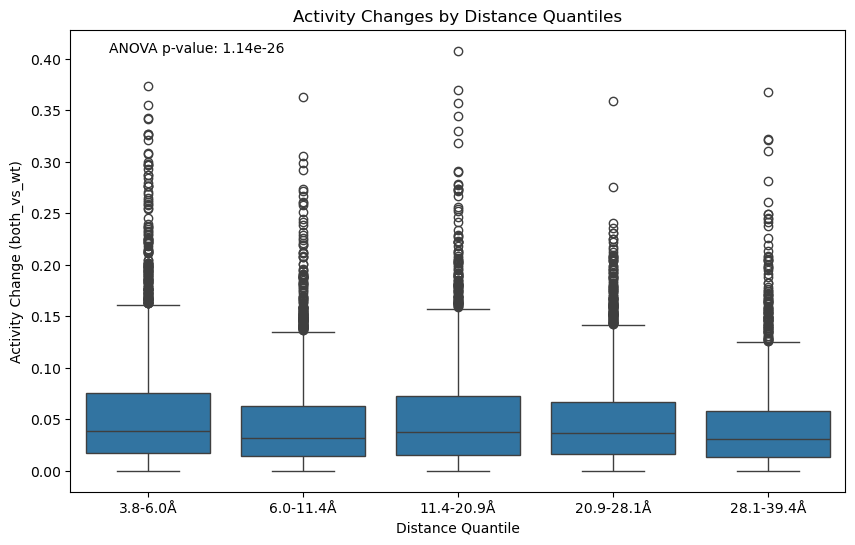

In [61]:
import seaborn as sns
import pandas as pd
import numpy as np

# Create distance quantiles (5 bins)
epistatic_quad_df['distance_quantile'] = pd.qcut(epistatic_quad_df['distance'], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=epistatic_quad_df, x='distance_quantile', y='both_vs_wt')
plt.xlabel('Distance Quantile')
plt.ylabel('Activity Change (both_vs_wt)')
plt.title('Activity Changes by Distance Quantiles')

# Optional: Add the quantile ranges to x-axis labels
quantile_ranges = pd.qcut(epistatic_quad_df['distance'], q=5).unique()
plt.xticks(range(5), [f'{q.left:.1f}-{q.right:.1f}Å' for q in sorted(quantile_ranges)])

# Optional: Add a statistical test
from scipy import stats
f_stat, p_val = stats.f_oneway(*[group['both_vs_wt'].values for name, group in epistatic_quad_df.groupby('distance_quantile')])
plt.text(0.05, 0.95, f'ANOVA p-value: {p_val:.2e}', transform=plt.gca().transAxes)


Summary Statistics:

Epistatic Pairs:
count    14079.000000
mean        17.565729
std          9.858908
min          3.780794
25%          8.631235
50%         18.696754
75%         26.657967
max         40.648586
Name: distance_min, dtype: float64

Random Pairs:
count    10000.000000
mean        18.068434
std          7.728960
min          0.000000
25%         12.723555
50%         17.618536
75%         22.731238
max         48.778603
Name: distance_min, dtype: float64

Mann-Whitney U test p-value: 7.15e-07


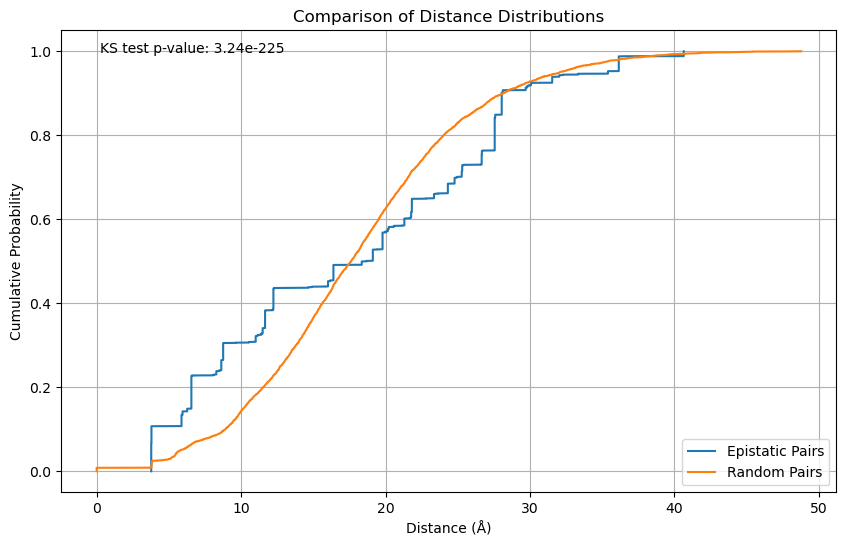

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Method 1: Plot empirical CDFs
def plot_cdfs(df1_distances, df2_distances, labels=['Epistatic Pairs', 'Random Pairs']):
    # Sort the data
    sorted_d1 = np.sort(df1_distances)
    sorted_d2 = np.sort(df2_distances)
    
    # Calculate CDFs
    p1 = np.arange(1, len(sorted_d1) + 1) / len(sorted_d1)
    p2 = np.arange(1, len(sorted_d2) + 1) / len(sorted_d2)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_d1, p1, label=labels[0])
    plt.plot(sorted_d2, p2, label=labels[1])
    plt.xlabel('Distance (Å)')
    plt.ylabel('Cumulative Probability')
    plt.title('Comparison of Distance Distributions')
    plt.legend()
    plt.grid(True)
    
    # Optional: Add KS test results
    ks_stat, p_value = stats.ks_2samp(df1_distances, df2_distances)
    plt.text(0.05, 0.95, f'KS test p-value: {p_value:.2e}', 
             transform=plt.gca().transAxes)

# Plot the CDFs
plot_cdfs(epistatic_quad_df.distance_min, random_distance_df.distance_min)

# Optional: Print some basic statistics
print("\nSummary Statistics:")
print("\nEpistatic Pairs:")
print(epistatic_quad_df.distance_min.describe())
print("\nRandom Pairs:")
print(random_distance_df.distance_min.describe())

# Optional: Run Mann-Whitney U test (tests if one distribution is stochastically greater)
stat, pval = stats.mannwhitneyu(epistatic_quad_df.distance_min, 
                               random_distance_df.distance_min,
                               alternative='two-sided')
print(f"\nMann-Whitney U test p-value: {pval:.2e}")

In [101]:
single_aa = phot_df[phot_df.num_mutations == 2].copy()
single_aa['locus'] = single_aa.mutant.apply(lambda v: get_locus_from_allele_id(v.split(':')[0]))
single_aa.sort_values('locus')


,Unnamed: 0,mutant,mutated_sequence,DMS_score,DMS_score_bin,seq_id,num_mutations,seq_id_set,nearby_seq_ids,locus
69,69,A1C,CGLRHTFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFLQ...,1.311108,1,A1C,2,{'A1C'},[],1
85,85,A1W,WGLRHTFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFLQ...,1.149853,1,A1W,2,{'A1W'},[],1
84,84,A1V,VGLRHTFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFLQ...,1.189536,1,A1V,2,{'A1V'},[],1
83,83,A1T,TGLRHTFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFLQ...,1.220654,1,A1T,2,{'A1T'},[],1
82,82,A1S,SGLRHTFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFLQ...,1.335889,1,A1S,2,{'A1S'},[],1
...,...,...,...,...,...,...,...,...,...,...
45,45,A118Q,AGLRHTFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFLQ...,1.386761,1,A118Q,2,{'A118Q'},[],118
44,44,A118P,AGLRHTFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFLQ...,1.256936,1,A118P,2,{'A118P'},[],118
43,43,A118M,AGLRHTFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFLQ...,1.268633,1,A118M,2,{'A118M'},[],118
49,49,A118V,AGLRHTFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFLQ...,1.259321,1,A118V,2,{'A118V'},[],118


In [106]:
epistatic_quad_df[epistatic_quad_df.base.apply(lambda v: '_' not in v)]

,base,mut1,mut2,base_mut1_mut2,allele1,allele2,base_activity,mut1_activity,mut2_activity,base_mut1_mut2_activity,both_vs_wt,distance,distance_quantile,distance_intra,distance_inter,distance_min
12850,R59N,R4D_R59N,R59N_D60Q,R4D_R59N_D60Q,R4D,D60Q,1.341061,1.255376,1.101439,1.375775,0.034714,21.77494,Q5,28.861063,21.77494,21.77494


In [32]:
phot_df.shape

(167529, 9)

In [1]:
# Now find quads. We will iterate through "base" and iterate
# through "mut1" and through "mut2", looking for the presence
# of the quad {"base", "base+mut1", "base+mut2", "base+mut1+mut2"}

for base_seq_id in phot_df.seq_id:
  print(base_seq_id)

NameError: name 'phot_df' is not defined

In [29]:
from tqdm import tqdm
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True)


phot_df['seq_id_set'] = phot_df.seq_id.apply(lambda sid: set(sid.split('_')))

seq_to_neighbors = {}

def get_nearby_seq_ids(base_seq_id_set):
  def get_distance_to_base_set(sid_set):
    # return len((base_seq_id_set | sid_set) - (base_seq_id_set & sid_set))
    return len(base_seq_id_set.symmetric_difference(sid_set))
  nearby_phots = phot_df[phot_df.seq_id_set.apply(get_distance_to_base_set) == 1]
  if len(nearby_phots) == 0:
    continue
  base_seq_id = '_'.join(sorted(base_seq_id_set))
  nearby_seq_ids = nearby_phots.seq_id.tolist()
  return nearby_seq_ids

phot_df['nearby_seq_ids'] = phot_df.seq_id_set.parallel_apply(get_nearby_seq_ids)

phot_df[phot_df.nearby_seq_ids.apply(len) > 0]


INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


  0%|          | 0/167529 [00:00<?, ?it/s]

  0%|          | 1/167529 [00:00<25:49:26,  1.80it/s]

  0%|          | 2/167529 [00:00<20:52:17,  2.23it/s]

  0%|          | 3/167529 [00:01<19:06:21,  2.44it/s]

  0%|          | 4/167529 [00:01<18:15:08,  2.55it/s]

  0%|          | 5/167529 [00:02<17:53:47,  2.60it/s]

  0%|          | 6/167529 [00:02<18:25:51,  2.52it/s]

  0%|          | 7/167529 [00:02<17:49:58,  2.61it/s]

  0%|          | 8/167529 [00:03<17:38:51,  2.64it/s]

  0%|          | 9/167529 [00:03<17:17:58,  2.69it/s]

  0%|          | 10/167529 [00:03<17:08:18,  2.72it/s]

  0%|          | 11/167529 [00:04<17:41:22,  2.63it/s]

  0%|          | 12/167529 [00:04<17:26:51,  2.67it/s]

  0%|          | 13/167529 [00:05<17:17:21,  2.69it/s]

  0%|          | 14/167529 [00:05<17:11:59,  2.71it/s]

  0%|          | 15/167529 [00:05<17:12:06,  2.71it/s]

  0%|          | 16/167529 [00:06<18:08:10,  2.57it/s]

  0%|          | 17/167529 [00:06<17:46:17,  2.62it/s]

  0%|          | 18/167529 [00:06<17:23:38,  2.68it/s]

  0%|          | 19/167529 [00:07<17:05:24,  2.72it/s]

  0%|          | 20/167529 [00:07<17:00:08,  2.74it/s]

  0%|          | 21/167529 [00:08<17:35:23,  2.65it/s]

  0%|          | 22/167529 [00:08<17:28:51,  2.66it/s]

  0%|          | 23/167529 [00:08<17:25:51,  2.67it/s]

  0%|          | 24/167529 [00:09<17:10:36,  2.71it/s]

  0%|          | 25/167529 [00:09<17:48:49,  2.61it/s]


KeyboardInterrupt: 